In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd/content/drive/MyDrive/deep learning/Dataset Plant Disease

/content/drive/MyDrive/deep learning/Dataset Plant Disease


In [ ]:
ls

fruit-dataset/  Veg-dataset/


In [ ]:
cd/content/drive/MyDrive/deep learning/Dataset Plant Disease/fruit-dataset/fruit-dataset/train

/content/drive/MyDrive/deep learning/Dataset Plant Disease/fruit-dataset/fruit-dataset/train


In [ ]:
ls

 Apple___Black_rot/        'Corn_(maize)___Northern_Leaf_Blight'/
 Apple___healthy/           Peach___Bacterial_spot/
'Corn_(maize)___healthy'/   Peach___healthy/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/deep learning/Dataset Plant Disease/fruit-dataset/fruit-dataset/train",target_size=(128,128),class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/deep learning/Dataset Plant Disease/fruit-dataset/fruit-dataset/test",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 1696 images belonging to 6 classes.


In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [ ]:
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [ ]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
225/225 [==============================] - 2494s 11s/step - loss: 0.8810 - accuracy: 0.8085 - val_loss: 0.2312 - val_accuracy: 0.9251
Epoch 2/10
225/225 [==============================] - 273s 1s/step - loss: 0.2250 - accuracy: 0.9216 - val_loss: 0.1804 - val_accuracy: 0.9404
Epoch 3/10
225/225 [==============================] - 311s 1s/step - loss: 0.1933 - accuracy: 0.9311 - val_loss: 0.2268 - val_accuracy: 0.9192
Epoch 4/10
225/225 [==============================] - 261s 1s/step - loss: 0.1608 - accuracy: 0.9411 - val_loss: 0.1281 - val_accuracy: 0.9552
Epoch 5/10
225/225 [==============================] - 269s 1s/step - loss: 0.1232 - accuracy: 0.9586 - val_loss: 0.1585 - val_accuracy: 0.9511
Epoch 6/10
225/225 [==============================] - 272s 1s/step - loss: 0.1008 - accuracy: 0.9662 - val_loss: 0.1083 - val_accuracy: 0.9658
Epoch 7/10
225/225 [==============================] - 269s 1s/step - loss: 0.1126 - accuracy: 0.9649 - val_loss: 0.1645 - val_accuracy: 0.95

In [ ]:
model.save('/content/drive/MyDrive/deep learning/Dataset Plant Disease/fruit-dataset/tmp/fruitdata.h5')

In [ ]:
model=load_model('/content/drive/MyDrive/deep learning/Dataset Plant Disease/fruit-dataset/tmp/fruitdata.h5')

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/deep learning/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/005b14ab-17f0-40c3-af15-87abf7d4ac23___Rutg._Bact.S 2083.JPG",target_size=(128,128))


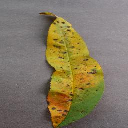

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[119., 119., 121.],
        [121., 121., 123.],
        [121., 121., 123.],
        ...,
        [157., 152., 158.],
        [155., 150., 156.],
        [157., 152., 158.]],

       [[127., 127., 129.],
        [124., 124., 126.],
        [124., 124., 126.],
        ...,
        [154., 149., 155.],
        [158., 153., 159.],
        [153., 148., 154.]],

       [[126., 126., 128.],
        [124., 124., 126.],
        [124., 124., 126.],
        ...,
        [155., 150., 156.],
        [155., 150., 156.],
        [153., 148., 154.]],

       ...,

       [[ 93.,  83.,  84.],
        [ 95.,  85.,  86.],
        [ 87.,  77.,  78.],
        ...,
        [114., 109., 113.],
        [115., 110., 114.],
        [113., 108., 112.]],

       [[ 88.,  78.,  79.],
        [ 88.,  78.,  79.],
        [ 89.,  79.,  80.],
        ...,
        [121., 116., 120.],
        [124., 119., 123.],
        [127., 122., 126.]],

       [[ 89.,  79.,  80.],
        [ 88.,  78.,  79.],
        [ 89.,  

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x

array([[[[119., 119., 121.],
         [121., 121., 123.],
         [121., 121., 123.],
         ...,
         [157., 152., 158.],
         [155., 150., 156.],
         [157., 152., 158.]],

        [[127., 127., 129.],
         [124., 124., 126.],
         [124., 124., 126.],
         ...,
         [154., 149., 155.],
         [158., 153., 159.],
         [153., 148., 154.]],

        [[126., 126., 128.],
         [124., 124., 126.],
         [124., 124., 126.],
         ...,
         [155., 150., 156.],
         [155., 150., 156.],
         [153., 148., 154.]],

        ...,

        [[ 93.,  83.,  84.],
         [ 95.,  85.,  86.],
         [ 87.,  77.,  78.],
         ...,
         [114., 109., 113.],
         [115., 110., 114.],
         [113., 108., 112.]],

        [[ 88.,  78.,  79.],
         [ 88.,  78.,  79.],
         [ 89.,  79.,  80.],
         ...,
         [121., 116., 120.],
         [124., 119., 123.],
         [127., 122., 126.]],

        [[ 89.,  79.,  80.],
       

In [ ]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 297ms/step


In [ ]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [ ]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']

In [ ]:
index[y[0]]

'Peach___Bacterial_spot'

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/deep learning/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/005b14ab-17f0-40c3-af15-87abf7d4ac23___Rutg._Bact.S 2083.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 71ms/step


'Peach___Bacterial_spot'